In [29]:
import pandas as pd

In [30]:
dataset = pd.read_csv("../Dataset/Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [31]:
Y = Y.reshape(
    len(Y),
    1
)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Feature Scaling
there is no coefficient to manage the higher and lower differences. So here we need to apply feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler

# Scale X and Y differently because Y will have different SD, AVG and Y will have different
X_SC = StandardScaler()
Y_SC = StandardScaler()

X = X_SC.fit_transform(X)
Y = Y_SC.fit_transform(Y)
print(X,"\n\n", Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Train the SVR model on whole dataset

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, Y)

c:\Users\singh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predict

In [34]:
Y_SC.inverse_transform(regressor.predict(X_SC.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

### Visualize SVR

Text(0, 0.5, 'Salary')

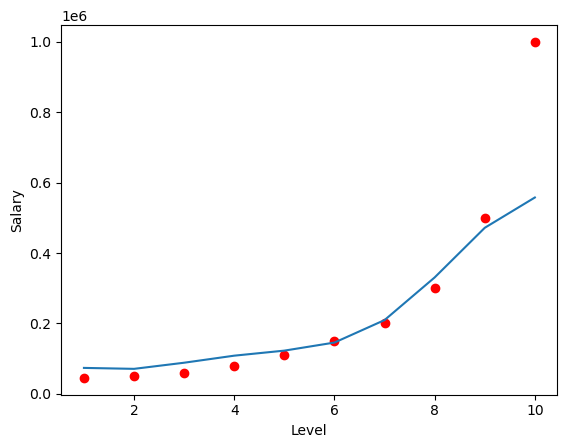

In [49]:
from matplotlib import pyplot as plt

plt.scatter(X_SC.inverse_transform(X), Y_SC.inverse_transform(Y), color='red')
plt.plot(X_SC.inverse_transform(X), Y_SC.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.xlabel("Level")
plt.ylabel("Salary")